# Story - 1 : Infrastructure Investment & Jobs Act Funding Allocation

## Instructions

he attached Excel file contains data on the present allocation of the Infrastructure Investment and Jobs Act funding by State and Territory.

Your story (Data Visualization(s) ) should address the following questions:

Is the allocation equitable based on the population of each of the States and Territories, or is bias apparent?

Does the allocation favor the political interests of the Biden administration?
Notes:

You will need to source data on the current (estimated) population of each of the States and Territories (accuracy is more important than precision) and on the official election results of the 2020 Presidential election.

You may choose to develop you visualizations using a desktop application or a code library. Your submittal should be in the form of a report (document) or a presentation.

This assignment is due by the end of week two of the semester.

## Coding Start

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

### Reading in the Raw Spending Data Provuded for assignment

In [2]:
## Reading in the Monetary data provided for assignment ( the Infrastructure Investment and Jobs Act passed 2021, so those pop numbers)
raw_spending = pd.read_excel("IIJA FUNDING AS OF MARCH 2023.xlsx")

## Processing the Spending Data 
raw_spending["Total (Billions)"] = raw_spending["Total (Billions)"].apply(lambda x : x * 1000)
raw_spending = raw_spending.rename(columns={"State, Teritory or Tribal Nation":"state","Total (Billions)":"Total in Millions"})
## Fixing Error 
raw_spending['state'][raw_spending["state"]=="DELEWARE"]="DELAWARE"

C:\Users\johnf\AppData\Local\Temp\ipykernel_77904\3588319301.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  raw_spending['state'][raw_spending["state"]=="DELEWARE"]="DELAWARE"
C:\Users\johnf\AppData\Local\Temp\ipykernel_77904\3588319301

### Reading in Raw Population Data 

In [3]:
## Pulling in the state population data Obtained from (https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html)
raw_pop = pd.read_excel("NST-EST2024-POP.xlsx")

### processing raw population data
first_half = raw_pop.iloc[[1]].values[0][:3]
second_half = raw_pop.iloc[[2]].values[0][2:]
columns_list = list(first_half) + list(second_half)
columns_list =[i for i in [ 'April 1, 2020 Estimates Base Population Estimate (as of July 1)' if i =='April 1, 2020 Estimates Base' else i for i in columns_list] if i !="Population Estimate (as of July 1)"] 
raw_pop_cropped  = raw_pop.loc[3:58]
raw_pop_cropped.columns = [str(i).replace('.0','') for i in columns_list]
state_populations = raw_pop_cropped[~raw_pop_cropped["Geographic Area"].isin(["United States","Northeast","Midwest","South","West"])]
state_populations = state_populations.rename(columns = {"Geographic Area":"state"})
state_populations['state'] = state_populations['state'].astype(str).str.replace(".","", regex=False).str.upper().str.strip() 
state_population_2021 = state_populations[['state','2021']]
state_population_2021

,state,2021
8,ALABAMA,5049196.0
9,ALASKA,734420.0
10,ARIZONA,7274078.0
11,ARKANSAS,3026870.0
12,CALIFORNIA,39142565.0
13,COLORADO,5814036.0
14,CONNECTICUT,3606607.0
15,DELAWARE,1005062.0
16,DISTRICT OF COLUMBIA,669256.0
17,FLORIDA,21831949.0


### Reading in 2020 Presidential Election Data

In [4]:
## State Vote 2020 Presidential Election (https://www.fec.gov/introduction-campaign-finance/election-results-and-voting-information/federal-elections-2020/)
#### Limiting to one tab for uploading to git hub; the "" tab
raw_vote = pd.read_excel("federalelections2020.xlsx", sheet_name="9. 2020 Pres General Results")

## Processing Raw Vote Data
limited_vote = raw_vote[["STATE","LAST NAME","WINNER INDICATOR"]][raw_vote["LAST NAME"].isin(["Trump","Biden"])]
limited_vote['STATE'] = limited_vote['STATE'].astype(str).str.upper().str.strip()
limited_vote["color"] = None
limited_vote["color"][((limited_vote['LAST NAME']=='Biden')&((limited_vote['WINNER INDICATOR']=='W')|(limited_vote['WINNER INDICATOR']=="W*")))]  = 'BLUE'
limited_vote["color"][((limited_vote['LAST NAME']=='Trump')&((limited_vote['WINNER INDICATOR']=='W')|(limited_vote['WINNER INDICATOR']=="W*")))]  = 'RED'
processed_vote = limited_vote[["STATE","color"]][~limited_vote["color"].isnull()]
processed_vote.columns = [c.lower() for c in processed_vote.columns]
processed_vote

C:\Users\johnf\AppData\Local\Temp\ipykernel_77904\1040109998.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  limited_vote["color"][((limited_vote['LAST NAME']=='Biden')&((limited_vote['WINNER INDICATOR']=='W')|(limited_vote['WINNER INDIC

,state,color
1,ALABAMA,RED
7,ALASKA,RED
17,ARIZONA,BLUE
27,ARKANSAS,RED
42,CALIFORNIA,BLUE
55,COLORADO,BLUE
80,CONNECTICUT,BLUE
95,DELAWARE,BLUE
118,DISTRICT OF COLUMBIA,BLUE
127,FLORIDA,RED


### Making Final DF for viz work

In [5]:
##  Joining all together
for_viz = raw_spending.merge(processed_vote, on='state', how= 'left').merge(state_population_2021, on='state',how='left')
## dropping non states / territories for assignment. 
for_viz = for_viz[~for_viz['color'].isnull()]
for_viz['color'] = for_viz['color'].astype(str).str.lower()
for_viz = for_viz.rename(columns={"2021":"Est. Population (2021)","state":"State"})
### Calculate spending per capita
for_viz['Spending Per Capita'] = (for_viz['Total in Millions'] * 1_000_000) / for_viz['Est. Population (2021)']
# Preview the updated DataFrame
final =for_viz[['State',"color", 'Total in Millions', 'Est. Population (2021)', 'Spending Per Capita']].sort_values(by=["Spending Per Capita"],ascending=False).drop_duplicates()


## Vizualization #1 - Pie Chart Overview

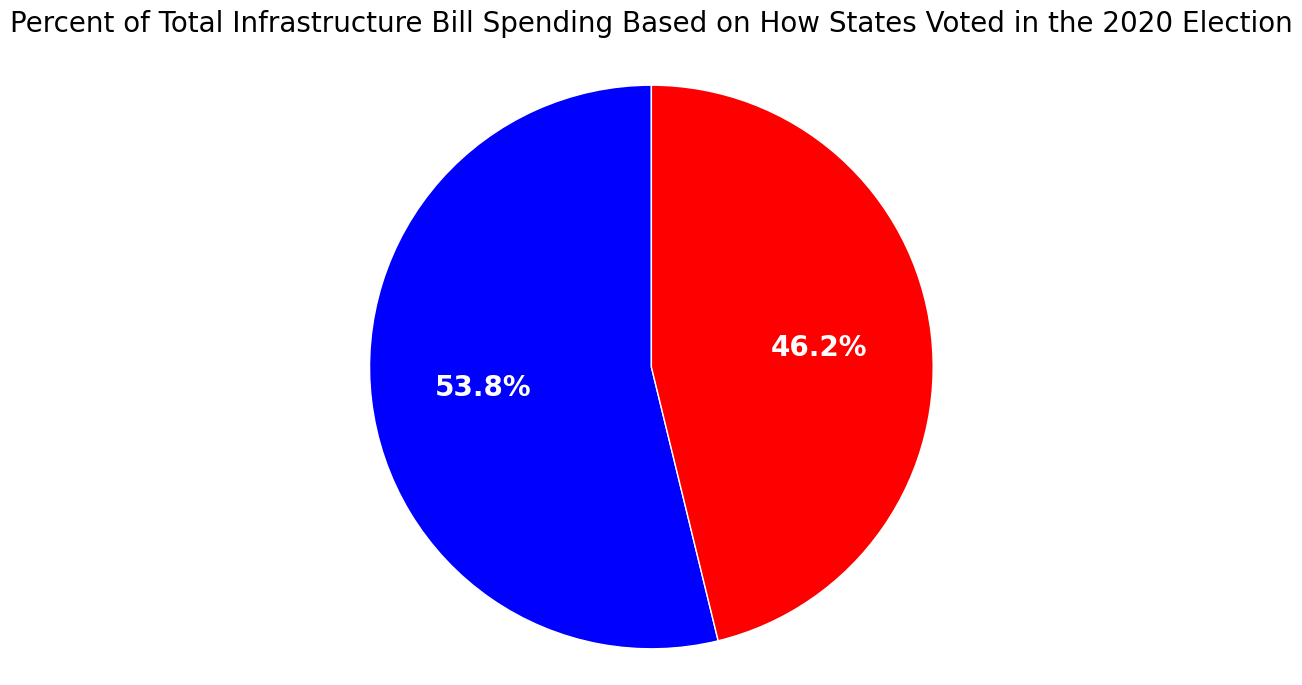

In [7]:
### First Viz  - Total Spending by Red and Blue States Based on the 2020 Election.
pie_df = final.groupby(['color']).agg({"Total in Millions":"sum"}).reset_index()
pie_df["Total In Billions"] = pie_df['Total in Millions']/1000
pie_df[["color","Total In Billions"]]


plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    pie_df['Total In Billions'],          # Values for slices
    labels=None,                          # No labels on the outside
    colors=pie_df['color'],               # Colors directly from the column
    autopct='%1.1f%%',                    # Show percentage
    startangle=90,                         # Start from top for a clean look
    wedgeprops={'edgecolor': 'white'}      # White borders between slices
)

for autotext in autotexts:
    autotext.set_color('white')           # White text
    autotext.set_fontsize(20)             # Larger font size
    autotext.set_weight('bold')           # Bold text

plt.title(
    "Percent of Total Infrastructure Bill Spending Based on How States Voted in the 2020 Election",
    fontsize=20,
    pad=20
)

# Ensure the pie chart is perfectly circular
plt.axis('equal')

plt.show()


## Visualization #2 - Per Capital Breakdown by State

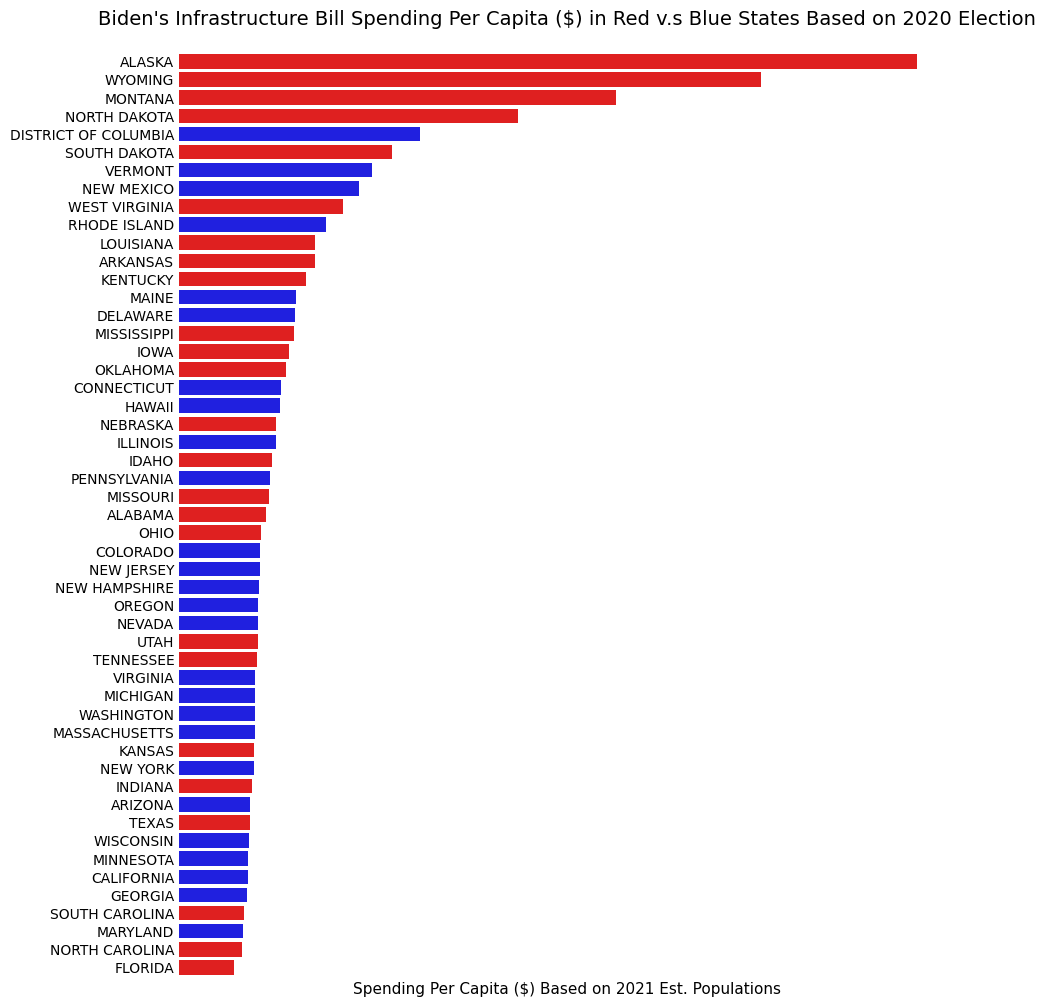

In [14]:
state_to_color = dict(zip(final['State'], final['color']))

plt.figure(figsize=(10, 12))
ax = sns.barplot(
    data=final,
    x='Spending Per Capita',
    y='State',
    hue='State',                         
    palette=state_to_color,              
    dodge=False,
    errorbar=None,
    edgecolor=None,
    legend=False
)

# Minimal styling
ax.set_xlabel("Spending Per Capita ($) Based on 2021 Est. Populations", fontsize=11)
plt.title("Biden's Infrastructure Bill Spending Per Capita ($) in Red v.s Blue States Based on 2020 Election", fontsize=14, loc='center', pad=20)
ax.set_ylabel('')
ax.set_xticks([])
ax.tick_params(axis='y', length=0)

plt.box(False)
plt.show()


## Visualization #3 - Median Per Capita Spending

In [33]:
viz_3 =final[['State','color',"Spending Per Capita"]]
# viz_3["Average Per Capita"] = viz_3["Spending Per Capita"].mean()
viz_3["Median Per Capita"] = viz_3["Spending Per Capita"].median()
# viz_3["Difference from Average"] = viz_3["Spending Per Capita"]-viz_3["Average Per Capita"]
viz_3["Difference from Median"] = viz_3["Spending Per Capita"]-viz_3["Median Per Capita"]
# viz_3["Percent Difference from Average"] = ((viz_3["Spending Per Capita"]-viz_3["Average Per Capita"])/viz_3["Average Per Capita"])*100
viz_3["Percent Difference from Median"] = ((viz_3["Spending Per Capita"]-viz_3["Median Per Capita"])/viz_3["Median Per Capita"])*100
viz_3["Percent Difference from Median"] = viz_3["Percent Difference from Median"].apply( lambda x : round(x,2))
viz_3 = viz_3.sort_values(by=["Percent Difference from Median"],ascending=False)

C:\Users\johnf\AppData\Local\Temp\ipykernel_77904\2144934511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_3["Median Per Capita"] = viz_3["Spending Per Capita"].median()


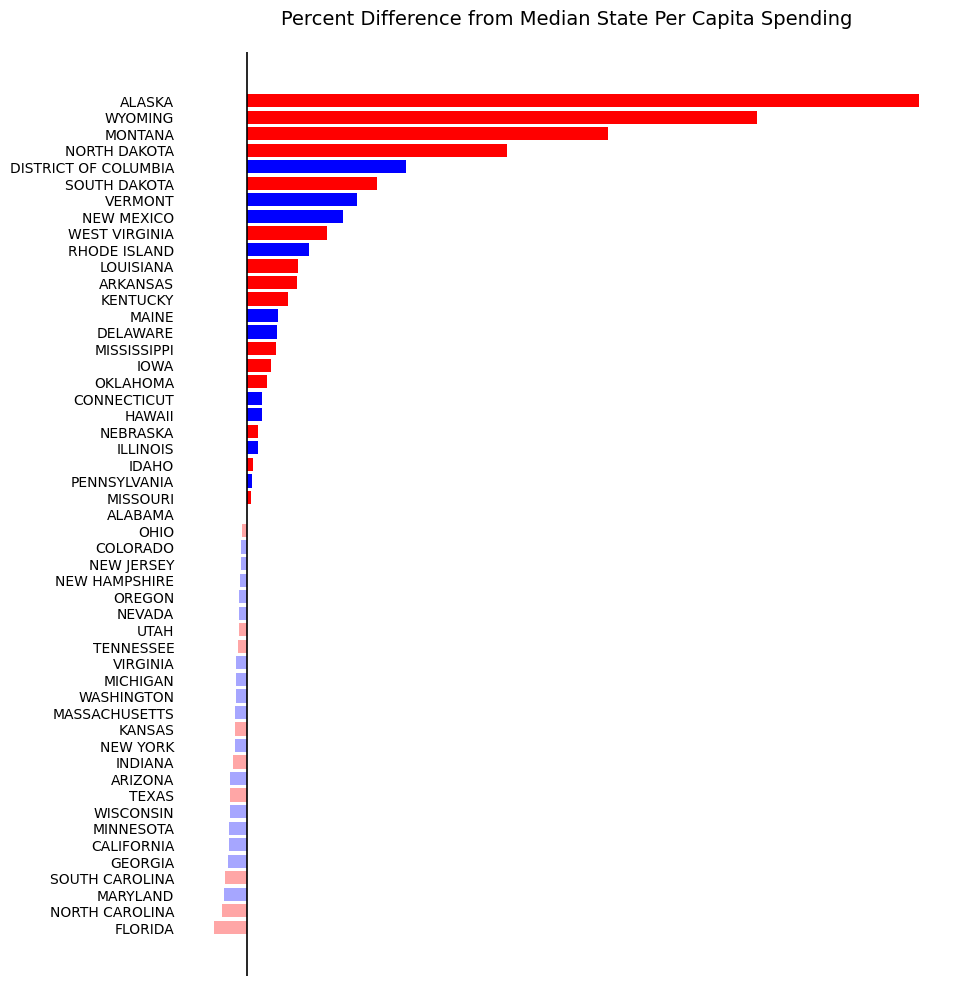

In [58]:
vals = viz_3['Percent Difference from Median']
base_colors = viz_3['color']
bar_colors = [mcolors.to_rgba(c, 1.0 if v >= 0 else 0.35) for c, v in zip(base_colors, vals)]

fig, ax = plt.subplots(figsize=(10, 12))
ax.barh(viz_3['State'], vals, color=bar_colors, linewidth=0)
ax.invert_yaxis() # Largest to smallest

ax.axvline(0, color='black', linewidth=1.2)


# Keep state names, hide everything else
ax.set_xlabel('')
ax.set_xticks([])                # Hide x-axis numbers
ax.tick_params(axis='y', length=0)  # Hide tick marks but keep labels

plt.box(False)
plt.title("Percent Difference from Median State Per Capita Spending", fontsize=14, loc='center', pad=20)#, color='gray')
plt.show()


## Answers Summary

#### Assumptions and Methodology Notes

For the purposes of this analysis 2021 population estmates for states were used as the Infrastructure Bill was passed that year. This assumes that the earmarked funds were calculated using those numbers. Additionally, only states were used in this spending breakdown, as territories do not typically impact general presdiential elections, and the premise of one of the questions is oriented aroudn the "political interests" of the Biden Administration.

#### Question 1) Is the allocation equitable based on the population of each of the States and Territories, or is bias apparent?

Upon first glance, the allocation may seem unfair towards red states, that is those states that did not vote for Biden in the 2020 presidential election. Of the total spending in the Infrastructure Bill, 53.8% of it went towards states that voted for Biden in 2020. However, when one considers the population of each state and the total amount spent on each state, a different picture emerges. Once one considers the per capita spending there are a handful of 2020 red states that receive more money per capital than the other states. The top four recipients of spending per capita are Alaska, Wyoming, Montana, and North Dakota. Lastly, when comparing the per capita spending for each state, 15 of the 25 states that received mre than the median per capital spending are red states. For those that are the more extreme outliers they tend to be extremely sparsely populated rural states. This can be interpreted to be a spending bias. 

#### Question 2) Does the allocation favor the political interests of the Biden administration? 

Using the visualizations above, the while the majority of the bill's spending went to blue states, according to the 2020 Elections, 60% (15/25) of the states that recevied funds above the state median per capita were red states. Of those states that received amounts below the state median per capita, 64% (16/25) were blue states. This would indicate that if there was a bias in spending it was towards states that did not support President Biden's election in 2020. Depending on how one interprets this, this can be seen as either not favoring the political interestsof the administration, or very much so favoring the insterests by investing more money into states that did not support Biden in hopes of helping democratic candidates in future elections.